🔄 Inicializando análisis XAU/USD avanzado...
📊 Temporalidades: ['1M', '15M']
               ANÁLISIS INSTITUCIONAL AVANZADO XAU/USD                
🔍 Símbolo: GC=F
⏱️  Temporalidades: 1M, 15M
⚙️  Parámetros:
   - Sensibilidad anomalías: Z > 2.8
   - Volumen significativo: > 1.5x media
   - Horario líquido: Londres 08:00:00-17:00:00 GMT | NY 13:00:00-18:00:00 GMT



Presiona Enter para generar el análisis avanzado... 



📊 Generando dashboard profesional avanzado...

⏳ Descargando datos 1m...
✅ Datos 1m obtenidos: 300 velas

⏳ Descargando datos 15m...
✅ Datos 15m obtenidos: 150 velas


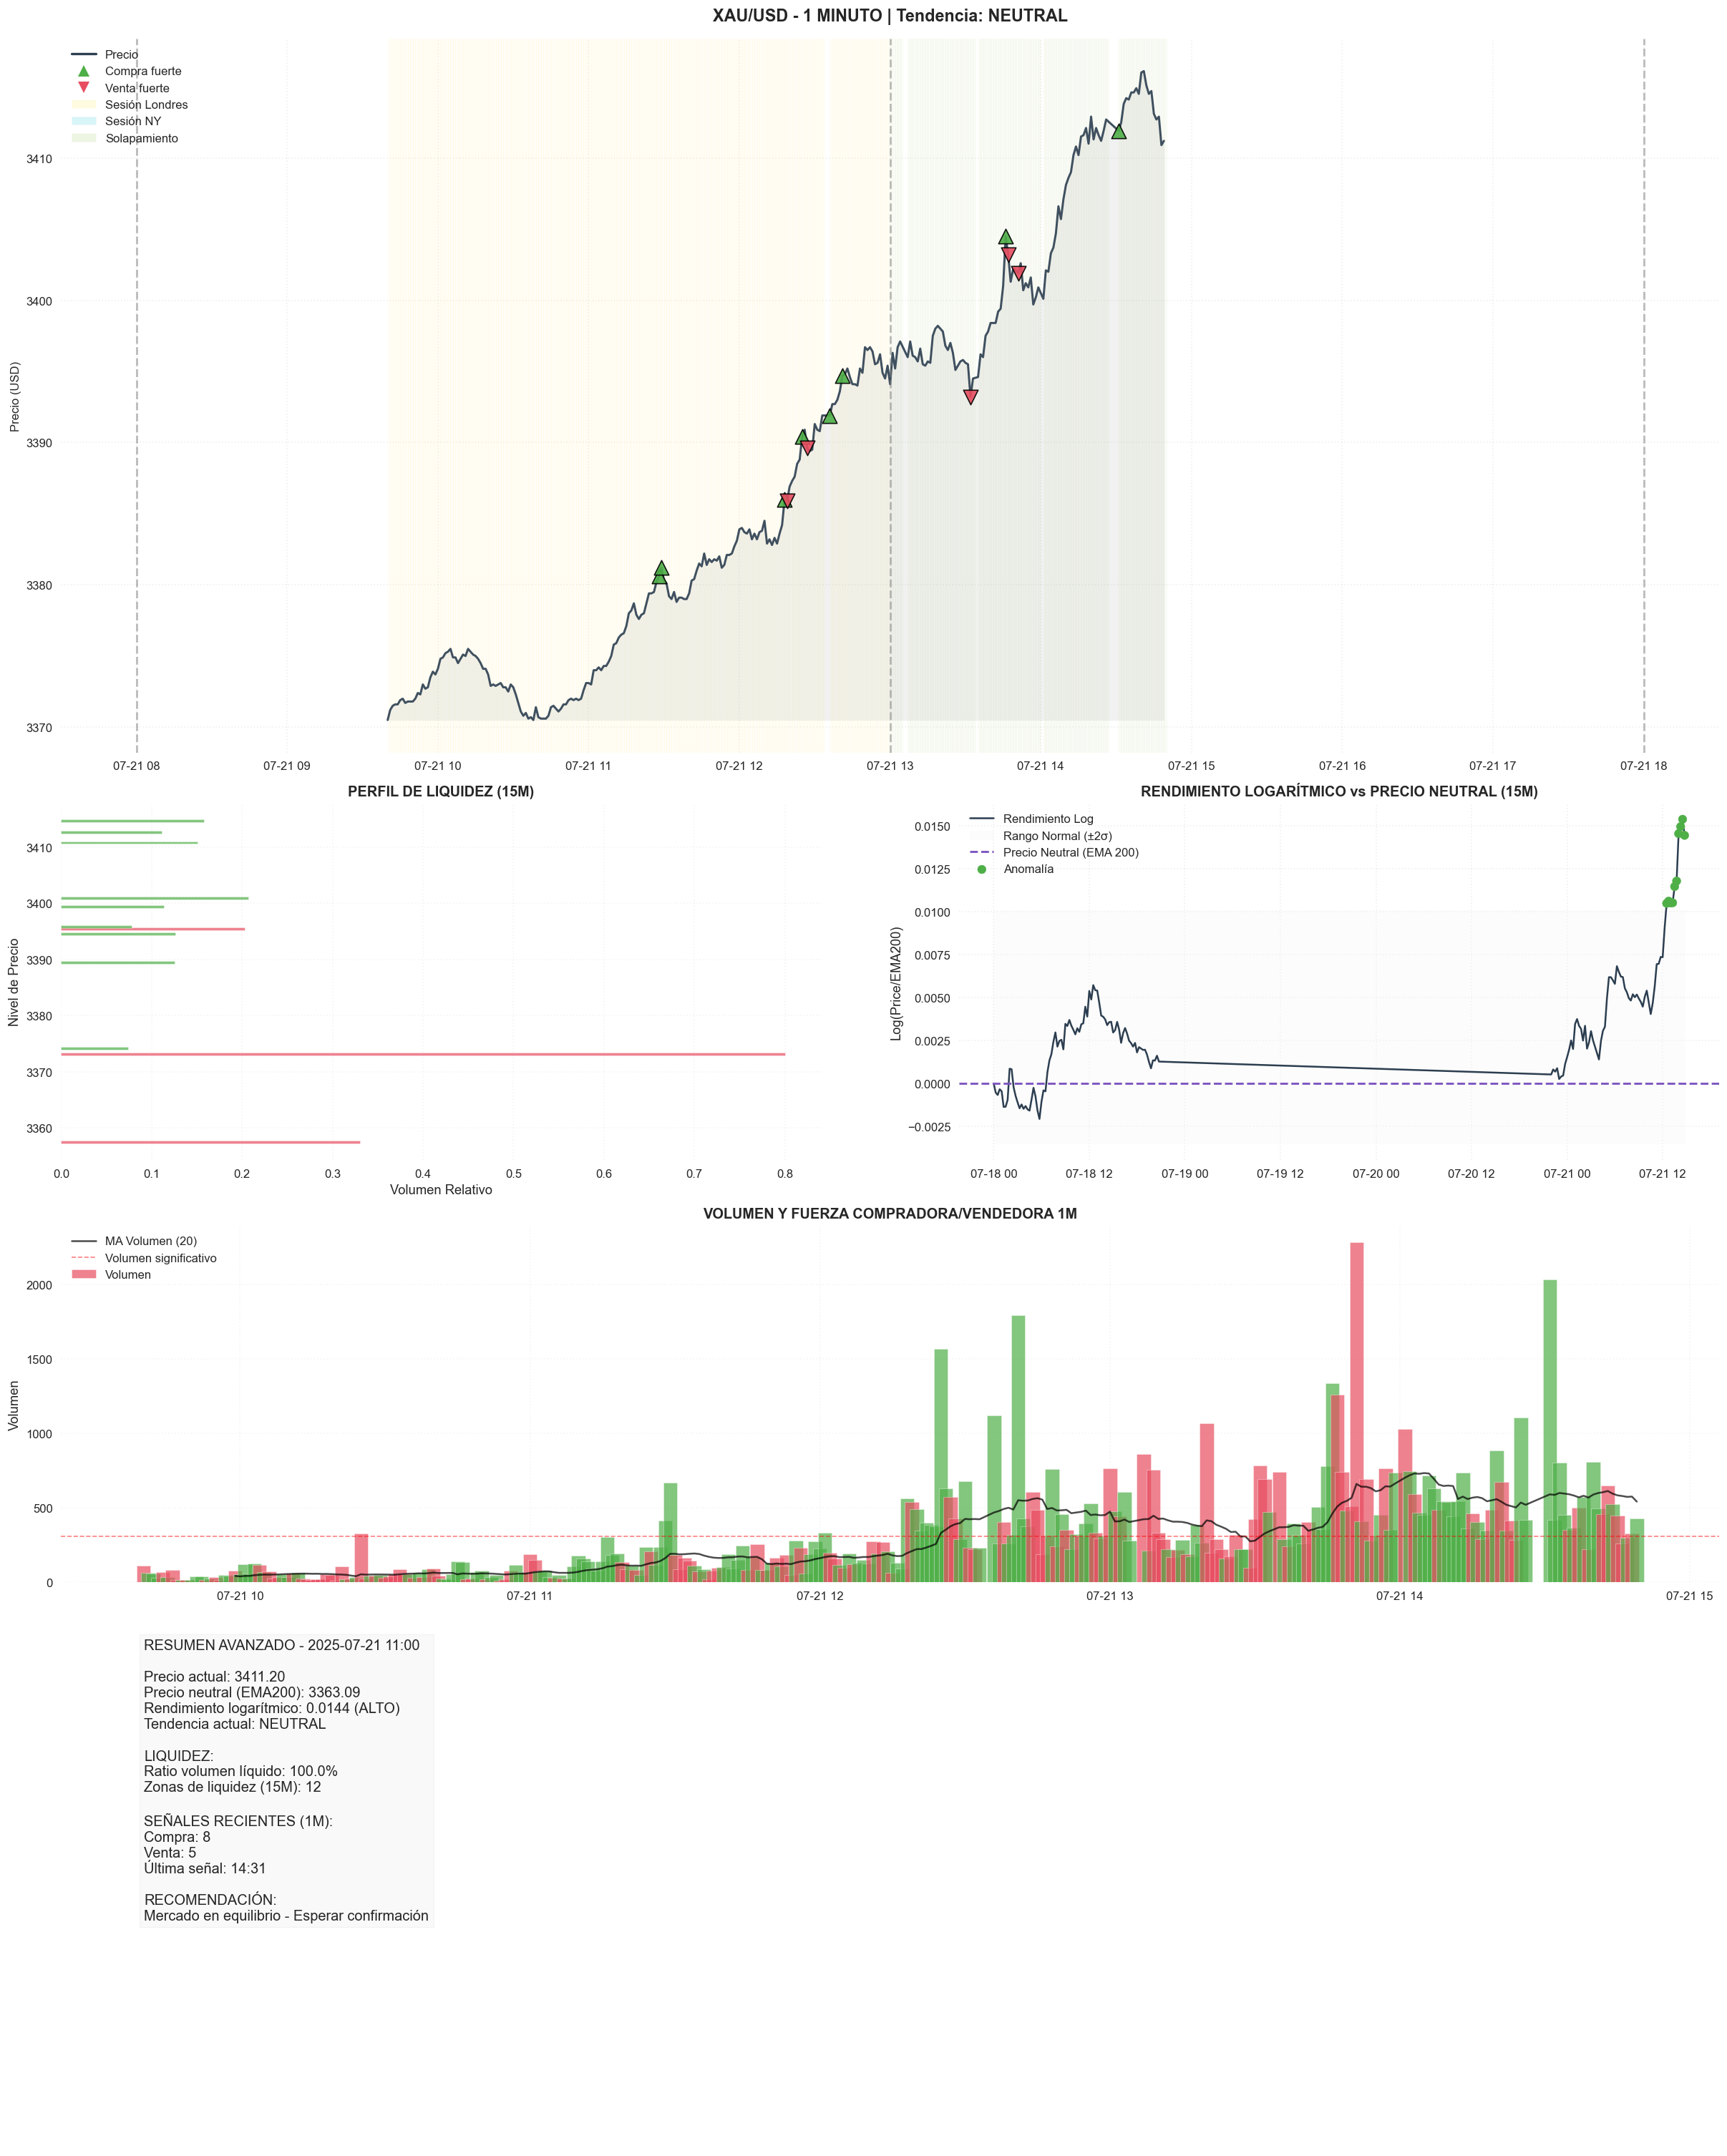


✅ Análisis avanzado completado


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta, time
from scipy import stats
import math

# Configuración visual profesional
plt.style.use('seaborn-v0_8')
sns.set_style("whitegrid")
plt.rcParams.update({
    'figure.figsize': (20, 25),
    'figure.dpi': 120,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold'
})

# Paleta de colores mejorada
COLORS = {
    'venta': "#E84D60",     # Rojo
    'compra': "#4EAF47",      # Verde
    'vol_alto': "#FF7F0E",   # Naranja
    'precio': "#2C3E50",     # Gris oscuro
    'tendencia_alcista': "#1f77b4",
    'tendencia_bajista': "#d62728",
    'fondo': "#f7f7f7",
    'london_session': "#FFF59D",  # Amarillo claro
    'ny_session': "#80DEEA",     # Azul claro
    'overlap_session': "#C5E1A5", # Verde claro
    'neutral_price': "#7E57C2"   # Púrpura
}

class AnalisisXAUUSD:
    def __init__(self):
        self.symbol = "GC=F"
        self.timeframes = {
            '1M': "1m",
            '15M': "15m"
        }
        
        # Parámetros optimizados
        self.anomaly_threshold = 2.8
        self.volume_multiplier = 2.0
        self.trend_volume_threshold = 1.5
        self.liquidity_volume_threshold = 2.0
        
        # Horarios de liquidez (GMT)
        self.london_open = time(8, 0)
        self.london_close = time(17, 0)
        self.ny_open = time(13, 0)  # 8AM EST = 1PM GMT
        self.ny_close = time(18, 0)  # 1PM EST = 6PM GMT
        
        print("🔄 Inicializando análisis XAU/USD avanzado...")
        print(f"📊 Temporalidades: {list(self.timeframes.keys())}")

    def detect_trend_by_volume(self, df):
        """Determina la tendencia predominante basada en volumen"""
        # Filtramos solo volumen alto
        high_volume = df[df['volume'] > self.trend_volume_threshold * df['volume'].median()]
        
        if len(high_volume) < 5:  # Mínimo de velas para determinar tendencia
            return 'neutral'
        
        # Ratio compra/venta en volumen alto
        buy_ratio = len(high_volume[high_volume['close'] > high_volume['open']]) / len(high_volume)
        
        if buy_ratio > 0.65:
            return 'alcista'
        elif buy_ratio < 0.35:
            return 'bajista'
        else:
            return 'neutral'

    def is_liquid_session(self, dt):
        """Determina si el horario es de alta liquidez"""
        dt_time = dt.time()
        london_session = self.london_open <= dt_time <= self.london_close
        ny_session = self.ny_open <= dt_time <= self.ny_close
        return london_session or ny_session

    def get_data(self, timeframe, count):
        """Obtiene y procesa datos con manejo de errores"""
        try:
            period_map = {'1m': '7d', '15m': '60d'}
            
            print(f"\n⏳ Descargando datos {timeframe}...")
            data = yf.download(
                tickers=self.symbol,
                period=period_map[timeframe],
                interval=timeframe,
                progress=False,
                auto_adjust=True
            )
            
            if data.empty:
                raise ValueError("No se recibieron datos del mercado")
                
            data = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
            data.columns = ['open', 'high', 'low', 'close', 'volume']
            data.index.name = 'timestamp'
            
            data = data[data['volume'] > 0].iloc[-count:]
            data['returns'] = data['close'].pct_change()
            
            # Añadir info de sesiones líquidas
            data['liquid_session'] = data.index.map(self.is_liquid_session)
            
            print(f"✅ Datos {timeframe} obtenidos: {len(data)} velas")
            return self.detect_anomalies(data)
            
        except Exception as e:
            print(f"⚠️ Error en datos reales: {str(e)}")
            return self.generate_simulated_data(timeframe, count)

    def generate_simulated_data(self, timeframe, count):
        """Genera datos simulados con sesiones líquidas"""
        np.random.seed(42)
        
        freq_map = {'1m': '1min', '15m': '15min'}
        dates = pd.date_range(end=pd.Timestamp.now(), periods=count, freq=freq_map[timeframe])
        
        # Simular patrones de liquidez
        base_price = 1800 + np.cumsum(np.random.randn(count) * 0.5)
        
        data = pd.DataFrame({
            'open': base_price,
            'high': base_price + np.abs(np.random.randn(count)) * 1.2,
            'low': base_price - np.abs(np.random.randn(count)) * 1.2,
            'close': base_price + np.random.randn(count) * 0.8,
            'volume': np.abs(np.random.normal(100, 30, count)).astype(int),
            'returns': np.zeros(count),
            'liquid_session': False
        }, index=dates)
        
        # Aplicar horarios líquidos simulados
        for i in range(len(data)):
            data.iloc[i, data.columns.get_loc('liquid_session')] = self.is_liquid_session(data.index[i])
            if data.iloc[i]['liquid_session']:
                data.iloc[i, data.columns.get_loc('volume')] = int(data.iloc[i]['volume'] * 1.8)
        
        data['returns'] = data['close'].pct_change()
        return data

    def detect_anomalies(self, df):
        """Detección mejorada de anomalías con filtro de liquidez"""
        # 1. Anomalías de volumen
        df['vol_mean'] = df['volume'].rolling(50, min_periods=10).mean()
        df['vol_std'] = df['volume'].rolling(50, min_periods=10).std()
        df['vol_z'] = (df['volume'] - df['vol_mean']) / (df['vol_std'] + 1e-6)
        
        # 2. Anomalías de precio
        returns = df['returns']
        median = returns.rolling(50, min_periods=10).median()
        mad = 1.4826 * np.abs(returns - median).rolling(50, min_periods=10).median()
        df['ret_z'] = (returns - median) / (mad + 1e-6)
        
        # 3. Filtro de liquidez
        df['liquidity_ok'] = df['volume'] > df['volume'].quantile(0.7)
        
        # Clasificación compuesta
        df['anomaly'] = (
            ((np.abs(df['vol_z']) > self.anomaly_threshold) |
            (np.abs(df['ret_z']) > self.anomaly_threshold)) &
            df['liquidity_ok']
        )
        
        # Tipo de anomalía (colores corregidos)
        conditions = [
            (df['close'] > df['open']) & df['anomaly'],  # Compra (rojo)
            (df['close'] < df['open']) & df['anomaly']   # Venta (verde)
        ]
        choices = ['compra', 'venta']
        df['anomaly_type'] = np.select(conditions, choices, default=None)
        
        return df

    def calculate_liquidity_zones(self, df):
        """Identifica zonas de liquidez significativa"""
        # Agrupar por niveles de precio redondeados
        df['price_level'] = df['close'].round(1)
        liquidity_zones = df.groupby('price_level')['volume'].sum().sort_values(ascending=False)
        
        # Filtrar zonas significativas
        significant_zones = liquidity_zones[liquidity_zones > self.liquidity_volume_threshold * df['volume'].mean()]
        
        # Crear DataFrame con info detallada
        zones_info = []
        for level in significant_zones.index:
            zone_data = df[df['price_level'] == level]
            zones_info.append({
                'price_level': level,
                'total_volume': significant_zones[level],
                'start_time': zone_data.index[0],
                'end_time': zone_data.index[-1],
                'buy_ratio': len(zone_data[zone_data['close'] > zone_data['open']]) / len(zone_data)
            })
        
        return pd.DataFrame(zones_info)

    def calculate_log_performance(self, df):
        """Calcula el rendimiento logarítmico vs precio neutral"""
        df['ema_200'] = df['close'].ewm(span=200, adjust=False).mean()
        df['log_return'] = np.log(df['close'] / df['ema_200'])
        
        # Calcular bandas de anomalía
        mean_log = df['log_return'].mean()
        std_log = df['log_return'].std()
        df['upper_band'] = mean_log + 2 * std_log
        df['lower_band'] = mean_log - 2 * std_log
        df['anomaly_log'] = (df['log_return'] > df['upper_band']) | (df['log_return'] < df['lower_band'])
        
        return df

    def plot_advanced_analysis(self):
        """Dashboard visual avanzado"""
        print("\n📊 Generando dashboard profesional avanzado...")
        
        # Obtención de datos
        data_1m = self.get_data('1m', 300)    # 5 horas
        data_15m = self.get_data('15m', 150)  # ~1.5 días
        
        # Procesamiento adicional
        data_15m = self.calculate_log_performance(data_15m)
        liquidity_zones = self.calculate_liquidity_zones(data_15m)
        current_trend = self.detect_trend_by_volume(data_1m)
        trend_color = COLORS['tendencia_alcista'] if current_trend == 'alcista' else COLORS['tendencia_bajista'] if current_trend == 'bajista' else "#7f7f7f"
        
        # Configuración del layout avanzado
        fig = plt.figure(constrained_layout=True)
        gs = gridspec.GridSpec(4, 2, figure=fig, height_ratios=[2,1,1,1.5])
        
        # --- Gráfico 1: Precio 1M con anomalías y sesiones ---
        ax1 = fig.add_subplot(gs[0, :])
        self._plot_price_with_sessions(ax1, data_1m, f"XAU/USD - 1 MINUTO | Tendencia: {current_trend.upper()}", trend_color)
        
        # --- Gráfico 2: Perfil de Liquidez 15M ---
        ax2 = fig.add_subplot(gs[1, 0])
        self._plot_liquidity_profile(ax2, liquidity_zones, "PERFIL DE LIQUIDEZ (15M)")
        
        # --- Gráfico 3: Rendimiento Logarítmico ---
        ax3 = fig.add_subplot(gs[1, 1])
        self._plot_log_performance(ax3, data_15m, "RENDIMIENTO LOGARÍTMICO vs PRECIO NEUTRAL (15M)")
        
        # --- Gráfico 4: Volumen y Tendencia 1M ---
        ax4 = fig.add_subplot(gs[2, :])
        self._plot_volume_trend(ax4, data_1m, "VOLUMEN Y FUERZA COMPRADORA/VENDEDORA 1M")
        
        # --- Gráfico 5: Resumen de Señales Avanzado ---
        ax5 = fig.add_subplot(gs[3, :])
        self._plot_advanced_summary(ax5, data_1m, data_15m, current_trend, liquidity_zones)
        
        plt.show()
        print("\n✅ Análisis avanzado completado")

    def _plot_price_with_sessions(self, ax, data, title, trend_color):
        """Gráfico de precio con sesiones líquidas"""
        # Dibujar áreas de sesiones
        for i in range(len(data)):
            dt = data.index[i]
            if self.london_open <= dt.time() <= self.london_close:
                if self.ny_open <= dt.time() <= self.ny_close:
                    ax.axvspan(dt, dt + timedelta(minutes=1), color=COLORS['overlap_session'], alpha=0.1)
                else:
                    ax.axvspan(dt, dt + timedelta(minutes=1), color=COLORS['london_session'], alpha=0.1)
            elif self.ny_open <= dt.time() <= self.ny_close:
                ax.axvspan(dt, dt + timedelta(minutes=1), color=COLORS['ny_session'], alpha=0.1)
        
        # Línea de precio principal
        ax.plot(data.index, data['close'], color=COLORS['precio'], linewidth=1.8, alpha=0.9, label='Precio')
        
        # Relleno de tendencia
        ax.fill_between(data.index, data['close'], data['close'].min(), color=trend_color, alpha=0.1)
        
        # Marcado de anomalías (con transparencia si fuera de horario líquido)
        if 'anomaly_type' in data.columns:
            anomalies = data[data['anomaly_type'].notna()]
            
            for idx, row in anomalies.iterrows():
                alpha = 0.9 if row['liquid_session'] else 0.3
                color = COLORS['compra'] if row['anomaly_type'] == "compra" else COLORS['venta']
                marker = '^' if row['anomaly_type'] == "compra" else 'v'
                
                ax.scatter(idx, row['close'], color=color, s=150, alpha=alpha,
                          label='Fuerza compradora' if row['anomaly_type'] == "compra" else 'Fuerza vendedora',
                          marker=marker, edgecolors='black', linewidth=1, zorder=5)
        
        # Líneas verticales para cambios de sesión
        ax.axvline(x=datetime.combine(data.index[0].date(), self.london_open), color='gray', linestyle='--', alpha=0.5)
        ax.axvline(x=datetime.combine(data.index[0].date(), self.ny_open), color='gray', linestyle='--', alpha=0.5)
        ax.axvline(x=datetime.combine(data.index[0].date(), self.ny_close), color='gray', linestyle='--', alpha=0.5)
        
        ax.set_title(title, pad=15, fontsize=14, fontweight='bold')
        ax.set_ylabel('Precio (USD)', fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.3)
        
        # Leyenda personalizada
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], color=COLORS['precio'], lw=2, label='Precio'),
            Line2D([0], [0], marker='^', color='w', label='Compra fuerte',
                  markerfacecolor=COLORS['compra'], markersize=10),
            Line2D([0], [0], marker='v', color='w', label='Venta fuerte',
                  markerfacecolor=COLORS['venta'], markersize=10),
            plt.Rectangle((0,0),1,1, fc=COLORS['london_session'], alpha=0.3, label='Sesión Londres'),
            plt.Rectangle((0,0),1,1, fc=COLORS['ny_session'], alpha=0.3, label='Sesión NY'),
            plt.Rectangle((0,0),1,1, fc=COLORS['overlap_session'], alpha=0.3, label='Solapamiento')
        ]
        ax.legend(handles=legend_elements, loc='upper left')

    def _plot_liquidity_profile(self, ax, liquidity_zones, title):
        """Gráfico de perfil de liquidez"""
        if liquidity_zones.empty:
            ax.text(0.5, 0.5, "No se detectaron zonas de liquidez significativas", 
                   ha='center', va='center', fontsize=12)
            ax.set_title(title)
            return
        
        # Ordenar por nivel de precio
        liquidity_zones = liquidity_zones.sort_values('price_level')
        
        # Dibujar barras horizontales
        for _, zone in liquidity_zones.iterrows():
            color = COLORS['compra'] if zone['buy_ratio'] > 0.5 else COLORS['venta']
            width = zone['total_volume'] / liquidity_zones['total_volume'].max() * 0.8
            ax.barh(zone['price_level'], width, height=0.5, color=color, alpha=0.7)
        
        ax.set_title(title, fontsize=12)
        ax.set_xlabel('Volumen Relativo')
        ax.set_ylabel('Nivel de Precio')
        ax.grid(True, linestyle=':', alpha=0.2)

    def _plot_log_performance(self, ax, data, title):
        """Gráfico de rendimiento logarítmico"""
        if 'log_return' not in data.columns:
            ax.text(0.5, 0.5, "Datos no disponibles", ha='center', va='center', fontsize=12)
            ax.set_title(title)
            return
        
        # Línea de rendimiento
        ax.plot(data.index, data['log_return'], color=COLORS['precio'], linewidth=1.5, label='Rendimiento Log')
        
        # Bandas y área
        ax.fill_between(data.index, data['upper_band'], data['lower_band'], color=COLORS['fondo'], alpha=0.3, label='Rango Normal (±2σ)')
        ax.axhline(0, color=COLORS['neutral_price'], linestyle='--', label='Precio Neutral (EMA 200)')
        
        # Anomalías
        anomalies = data[data['anomaly_log']]
        if not anomalies.empty:
            ax.scatter(anomalies.index, anomalies['log_return'], 
                      color=np.where(anomalies['log_return'] > 0, COLORS['compra'], COLORS['venta']),
                      s=50, label='Anomalía', zorder=5)
        
        ax.set_title(title, fontsize=12)
        ax.set_ylabel('Log(Price/EMA200)')
        ax.grid(True, linestyle=':', alpha=0.3)
        ax.legend()

    def _plot_volume_trend(self, ax, data, title):
        """Gráfico de volumen y tendencia"""
        # Barras de volumen coloreadas
        colors = np.where(
            data['close'] > data['open'],
            COLORS['compra'],
            COLORS['venta']
        )
        
        ax.bar(data.index, data['volume'], color=colors, width=0.002, alpha=0.7, label='Volumen')
        
        # Media móvil de volumen
        if len(data) > 20:
            ax.plot(data.index, data['volume'].rolling(20).mean(),
                   color='black', linewidth=1.5, alpha=0.7, label='MA Volumen (20)')
        
        # Líneas de volumen significativo
        vol_threshold = self.trend_volume_threshold * data['volume'].median()
        ax.axhline(vol_threshold, color='red', linestyle='--', alpha=0.5, linewidth=1, label='Volumen significativo')
        
        ax.set_title(title, fontsize=12)
        ax.set_ylabel('Volumen')
        ax.grid(True, linestyle=':', alpha=0.2)
        ax.legend(loc='upper left')

    def _plot_advanced_summary(self, ax, data_1m, data_15m, trend, liquidity_zones):
        """Resumen estadístico avanzado"""
        ax.axis('off')
        
        # Datos para el resumen
        signals_1m = data_1m[data_1m['anomaly_type'].notna()]
        signals_15m = data_15m[data_15m['anomaly_type'].notna()]
        
        current_price = data_1m['close'].iloc[-1]
        last_signal = signals_1m.index[-1].strftime('%H:%M') if not signals_1m.empty else "Ninguna"
        
        # Calcular estadísticas de liquidez
        liquid_volume = data_1m[data_1m['liquid_session']]['volume'].sum()
        total_volume = data_1m['volume'].sum()
        liquidity_ratio = liquid_volume / total_volume if total_volume > 0 else 0
        
        # Información de rendimiento logarítmico
        if 'log_return' in data_15m.columns:
            log_return = data_15m['log_return'].iloc[-1]
            ema_200 = data_15m['ema_200'].iloc[-1]
            log_status = "ALTO" if log_return > data_15m['upper_band'].iloc[-1] else "BAJO" if log_return < data_15m['lower_band'].iloc[-1] else "NORMAL"
        else:
            log_return = "N/A"
            ema_200 = "N/A"
            log_status = "N/A"
        
        # Texto del resumen
        summary_text = [
            f"RESUMEN AVANZADO - {datetime.now().strftime('%Y-%m-%d %H:%M')}",
            f"\nPrecio actual: {current_price:.2f}",
            f"Precio neutral (EMA200): {ema_200:.2f}" if isinstance(ema_200, float) else f"Precio neutral: {ema_200}",
            f"Rendimiento logarítmico: {log_return:.4f} ({log_status})" if isinstance(log_return, float) else f"Rendimiento: {log_return}",
            f"Tendencia actual: {trend.upper()}",
            f"\nLIQUIDEZ:",
            f"Ratio volumen líquido: {liquidity_ratio:.1%}",
            f"Zonas de liquidez (15M): {len(liquidity_zones)}",
            f"\nSEÑALES RECIENTES (1M):",
            f"Compra: {len(signals_1m[signals_1m['anomaly_type'] == 'compra'])}",
            f"Venta: {len(signals_1m[signals_1m['anomaly_type'] == 'venta'])}",
            f"Última señal: {last_signal}",
            f"\nRECOMENDACIÓN:",
            self._generate_advanced_recommendation(trend, signals_1m, signals_15m, log_status)
        ]
        
        ax.text(0.05, 0.95, "\n".join(summary_text), 
               ha='left', va='top', fontsize=12, 
               bbox=dict(facecolor=COLORS['fondo'], alpha=0.7, edgecolor='#dddddd'))

    def _generate_advanced_recommendation(self, trend, signals_1m, signals_15m, log_status):
        """Genera recomendación avanzada"""
        buy_1m = len(signals_1m[signals_1m['anomaly_type'] == 'compra'])
        sell_1m = len(signals_1m[signals_1m['anomaly_type'] == 'venta'])
        
        buy_15m = len(signals_15m[signals_15m['anomaly_type'] == 'compra'])
        sell_15m = len(signals_15m[signals_15m['anomaly_type'] == 'venta'])
        
        # Lógica de recomendación mejorada
        if log_status == "ALTO" and (sell_1m + sell_15m) > (buy_1m + buy_15m):
            return "ALERTA: Sobrecompra con fuerza vendedora - Considerar toma de ganancias"
        elif log_status == "BAJO" and (buy_1m + buy_15m) > (sell_1m + sell_15m):
            return "OPORTUNIDAD: Sobreventa con fuerza compradora - Considerar posiciones largas"
        elif trend == 'alcista' and (buy_1m + buy_15m) > (sell_1m + sell_15m):
            return "Tendencia alcista con confirmación - Buscar entradas largas"
        elif trend == 'bajista' and (sell_1m + sell_15m) > (buy_1m + buy_15m):
            return "Tendencia bajista con confirmación - Buscar entradas cortas"
        else:
            return "Mercado en equilibrio - Esperar confirmación"

    def run(self):
        """Método principal de ejecución"""
        print("="*70)
        print("ANÁLISIS INSTITUCIONAL AVANZADO XAU/USD".center(70))
        print("="*70)
        print(f"🔍 Símbolo: {self.symbol}")
        print(f"⏱️  Temporalidades: {', '.join(self.timeframes.keys())}")
        print(f"⚙️  Parámetros:")
        print(f"   - Sensibilidad anomalías: Z > {self.anomaly_threshold}")
        print(f"   - Volumen significativo: > {self.trend_volume_threshold}x media")
        print(f"   - Horario líquido: Londres {self.london_open}-{self.london_close} GMT | NY {self.ny_open}-{self.ny_close} GMT")
        
        input("\nPresiona Enter para generar el análisis avanzado...")
        self.plot_advanced_analysis()

# Ejecución del análisis avanzado
analyzer = AnalisisXAUUSD()
analyzer.run()